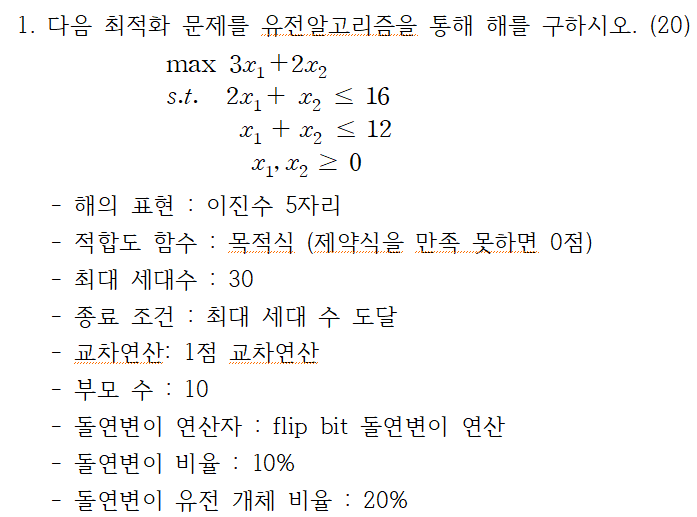

# 선형계획법

In [2]:
from pulp import *

# 문제 생성
problem = LpProblem("Linear Programming Problem", LpMaximize)

# 변수 생성
x1 = LpVariable("x1", lowBound=0, cat='Continuous')
x2 = LpVariable("x2", lowBound=0, cat='Continuous')

# 목적함수 추가
problem += 3 * x1 + 2 * x2

# 제약조건 추가
problem += 2 * x1 + x2 <= 16
problem += x1 + x2 <= 12

# 문제 풀이
problem.solve()

# 결과 출력
print("상태:", LpStatus[problem.status])
print("x1 =", value(x1))
print("x2 =", value(x2))
print("최적값 =", value(problem.objective))


Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /home/a202192006/.local/lib/python3.8/site-packages/pulp/solverdir/cbc/linux/64/cbc /tmp/7a8a84bbb21246e38c4d37a2cfaa4bba-pulp.mps max timeMode elapsed branch printingOptions all solution /tmp/7a8a84bbb21246e38c4d37a2cfaa4bba-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 7 COLUMNS
At line 14 RHS
At line 17 BOUNDS
At line 18 ENDATA
Problem MODEL has 2 rows, 2 columns and 4 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Presolve 2 (0) rows, 2 (0) columns and 4 (0) elements
0  Obj -0 Dual inf 4.9999998 (2)
0  Obj -0 Dual inf 4.9999998 (2)
2  Obj 28
Optimal - objective value 28
Optimal objective 28 - 2 iterations time 0.002
Option for printingOptions changed from normal to all
Total time (CPU seconds):       0.00   (Wallclock seconds):       0.00

상태: Optimal
x1 = 4.0
x2 = 8.0
최적값 = 28.0


# 유전알고리즘 적용

In [6]:
import random

# 유전 알고리즘 파라미터
POPULATION_SIZE = 10
MAX_GENERATIONS = 30
MUTATION_RATE = 0.1
GENE_LENGTH = 5

# 목적식과 제약식
def objective_function(x1, x2):
    return 3 * x1 + 2 * x2

def constraint1(x1, x2):
    return 2 * x1 + x2 <= 16

def constraint2(x1, x2):
    return x1 + x2 <= 12

# 이진수를 실수로 변환
def decode(individual):
    x1 = int(''.join(str(bit) for bit in individual[:GENE_LENGTH]), 2)
    x2 = int(''.join(str(bit) for bit in individual[GENE_LENGTH:]), 2)
    return x1, x2

# 적합도 함수 계산
def fitness_function(individual):
    x1, x2 = decode(individual)
    if constraint1(x1, x2) and constraint2(x1, x2):
        return objective_function(x1, x2)
    else:
        return 0

# 초기 유전 개체 생성
def generate_individual():
    return [random.randint(0, 1) for _ in range(GENE_LENGTH * 2)]

# 초기 유전 개체 모음 생성
def generate_population():
    return [generate_individual() for _ in range(POPULATION_SIZE)]

# 선택 연산: 토너먼트 선택
def selection(population):
    tournament_size = 2
    selected_parents = []
    for _ in range(POPULATION_SIZE):
        tournament = random.sample(population, tournament_size)
        best_individual = max(tournament, key=fitness_function)
        selected_parents.append(best_individual)
    return selected_parents

# 교차 연산: 1점 교차연산
def crossover(parents):
    offspring = []
    for i in range(0, POPULATION_SIZE, 2):
        parent1 = parents[i]
        parent2 = parents[i + 1]
        crossover_point = random.randint(1, GENE_LENGTH * 2 - 1)
        child1 = parent1[:crossover_point] + parent2[crossover_point:]
        child2 = parent2[:crossover_point] + parent1[crossover_point:]
        offspring.extend([child1, child2])
    return offspring

# 돌연변이 연산: flip bit 돌연변이 연산
def mutate(offspring):
    mutated_offspring = []
    for individual in offspring:
        mutated_individual = individual.copy()
        for i in range(GENE_LENGTH * 2):
            if random.random() < MUTATION_RATE:
                mutated_individual[i] = 1 - mutated_individual[i]
        mutated_offspring.append(mutated_individual)
    return mutated_offspring

# 메인 함수
def main():
    population = generate_population()
    best_solution = None
    best_fitness = float('-inf')

    for generation in range(MAX_GENERATIONS):
        print(f"Generation {generation+1}")
        for individual in population:
            fitness = fitness_function(individual)
            if fitness > best_fitness:
                best_fitness = fitness
                best_solution = individual
            print(f"Individual: {individual}, Fitness: {fitness}")
        
        parents = selection(population)
        offspring = crossover(parents)
        mutated_offspring = mutate(offspring)
        population = mutated_offspring

    best_x1, best_x2 = decode(best_solution)
    print("\nBest Solution:")
    print(f"x1: {best_x1}, x2: {best_x2}")
    print(f"Fitness: {best_fitness}")

# 메인 함수 호출
if __name__ == "__main__":
    main()


Generation 1
Individual: [0, 1, 1, 1, 0, 0, 1, 0, 0, 0], Fitness: 0
Individual: [1, 1, 1, 0, 0, 0, 1, 1, 0, 0], Fitness: 0
Individual: [1, 1, 0, 0, 1, 1, 1, 1, 0, 0], Fitness: 0
Individual: [0, 1, 1, 1, 0, 0, 1, 1, 0, 1], Fitness: 0
Individual: [1, 1, 1, 0, 1, 0, 1, 0, 1, 1], Fitness: 0
Individual: [0, 0, 1, 0, 0, 1, 1, 0, 0, 1], Fitness: 0
Individual: [0, 1, 1, 0, 0, 1, 1, 1, 1, 1], Fitness: 0
Individual: [1, 1, 1, 1, 0, 1, 1, 1, 1, 0], Fitness: 0
Individual: [0, 0, 1, 1, 1, 1, 0, 1, 0, 1], Fitness: 0
Individual: [0, 1, 0, 1, 0, 1, 0, 1, 0, 1], Fitness: 0
Generation 2
Individual: [0, 1, 1, 1, 1, 1, 0, 1, 0, 0], Fitness: 0
Individual: [0, 0, 1, 0, 0, 1, 1, 1, 1, 1], Fitness: 0
Individual: [1, 0, 1, 0, 0, 0, 1, 1, 0, 1], Fitness: 0
Individual: [0, 1, 0, 1, 0, 1, 0, 0, 0, 0], Fitness: 0
Individual: [0, 1, 1, 1, 0, 1, 0, 1, 1, 1], Fitness: 0
Individual: [0, 1, 0, 1, 0, 0, 1, 1, 0, 1], Fitness: 0
Individual: [1, 0, 0, 0, 1, 1, 1, 1, 0, 0], Fitness: 0
Individual: [1, 1, 0, 0, 1, 0, 1, 0, 0,

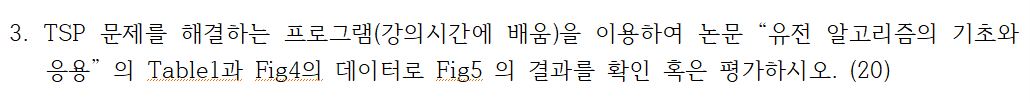
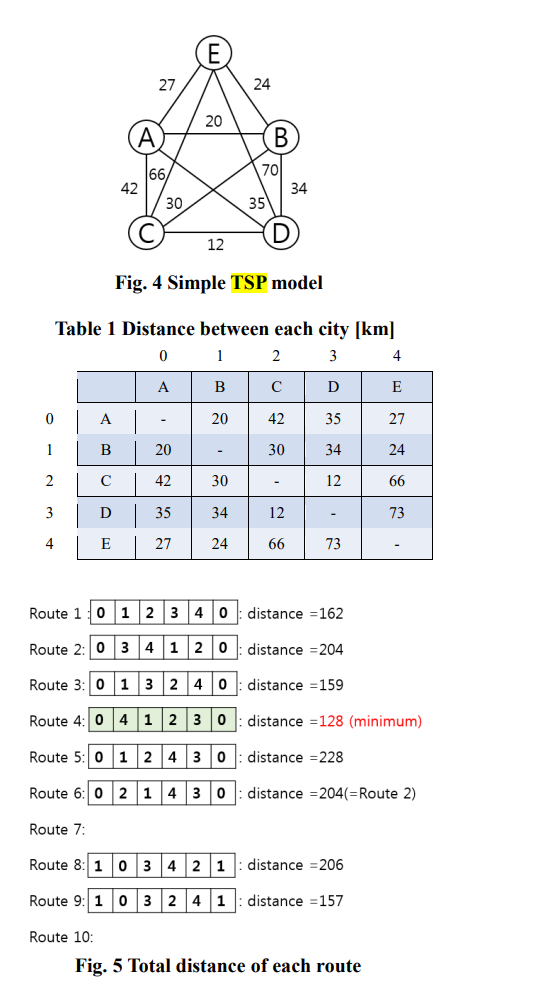

In [76]:
import random

# TSP 데이터
distances = [
    [0, 20, 42, 35, 27],
    [20, 0, 30, 34, 24],
    [42, 30, 0, 12, 66],
    [35, 34, 12, 0, 73],
    [27, 24, 66, 73, 0]
]

# 유전 알고리즘 매개변수
population_size = 50  # 개체 수
elite_size = 5  # 엘리트 개체 수
mutation_rate = 0.01  # 돌연변이 확률
generations = 100  # 세대 수

# 랜덤한 개체 생성
def create_individual():
    individual = list(range(len(distances)))
    random.shuffle(individual)
    return individual

# 개체의 적합도(거리의 역수) 계산
def calculate_fitness(individual):
    total_distance = 0
    for i in range(len(individual)):
        from_city = individual[i]
        to_city = individual[(i + 1) % len(individual)]
        total_distance += distances[from_city][to_city]
    fitness = 1 / total_distance
    return fitness

# 교차 연산을 통해 자식 개체 생성
def crossover(parent1, parent2):
    child = [None] * len(parent1)
    start = random.randint(0, len(parent1) - 1)
    end = random.randint(0, len(parent1) - 1)
    if start < end:
        for i in range(start, end):
            child[i] = parent1[i]
    elif start > end:
        for i in range(end, start):
            child[i] = parent1[i]
    for i in range(len(parent2)):
        if parent2[i] not in child:
            for j in range(len(child)):
                if child[j] is None:
                    child[j] = parent2[i]
                    break
    return child

# 돌연변이 연산을 통해 개체 변이
def mutate(individual):
    for i in range(len(individual)):
        if random.random() < mutation_rate:
            swap_index = random.randint(0, len(individual) - 1)
            individual[i], individual[swap_index] = individual[swap_index], individual[i]
    return individual

# 초기 개체 집합 생성
def create_initial_population():
    population = []
    for _ in range(population_size):
        population.append(create_individual())
    return population

# 개체 집합을 적합도에 따라 순위 매김
def rank_population(population):
    ranked_population = sorted(population, key=lambda x: calculate_fitness(x), reverse=True)
    return ranked_population

# 선택 연산을 통해 엘리트 개체 선택
def selection(ranked_population):
    selected = ranked_population[:elite_size]
    return selected

#선택된 엘리트 개체를 바탕으로 교차 연산 수행
def breeding_pool(selected):
    pool = []
    for _ in range(len(selected)):
        parent1 = random.choice(selected)
        parent2 = random.choice(selected)
        child = crossover(parent1, parent2)
        pool.append(child)
    return pool

#    다음 세대의 개체 집합 생성
def next_generation(current_population):
    ranked_population = rank_population(current_population)
    selected = selection(ranked_population)
    pool = breeding_pool(selected)
    next_generation_population = selected + pool
    next_generation_population = [mutate(individual) for individual in next_generation_population]
    return next_generation_population

#   유전 알고리즘을 사용한 TSP 문제 해결
def tsp_ga():
    population = create_initial_population()
    for _ in range(generations):
        population = next_generation(population)
    ranked_population = rank_population(population)
    return ranked_population


best_routes = tsp_ga()

print("경로 {}: {}".format(i, route_string))
print("거리 {}: {}".format(i, total_distance))

경로 4: 0 -> 4 -> 1 -> 2 -> 3 -> 0
거리 4: 128


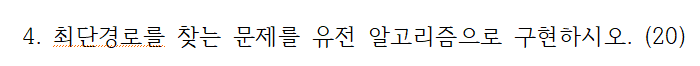

> 알고리즘 강의 최단경로 예제 문제
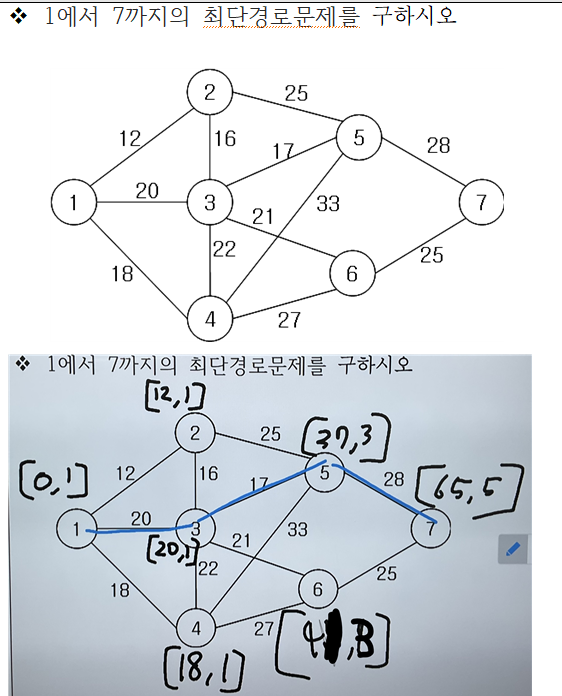

# 다익스트라 알고리즘

In [139]:
import heapq

def shortest_path(graph, start, end):
    # 초기화
    distances = {vertex: float('inf') for vertex in graph}
    distances[start] = 0
    queue = [(0, start)]
    path = {}

    while queue:
        # 가장 최단 거리를 가진 노드 선택
        current_distance, current_vertex = heapq.heappop(queue)

        # 이미 처리한 노드라면 스킵
        if current_distance > distances[current_vertex]:
            continue

        # 현재 노드와 인접한 노드들을 탐색
        for neighbor, weight in graph[current_vertex].items():
            distance = current_distance + weight

            # 더 짧은 거리를 발견한 경우 업데이트
            if distance < distances[neighbor]:
                distances[neighbor] = distance
                path[neighbor] = current_vertex
                heapq.heappush(queue, (distance, neighbor))

    # 최단 경로 추적
    shortest_path = []
    current_vertex = end
    while current_vertex != start:
        shortest_path.append(current_vertex)
        current_vertex = path[current_vertex]
    shortest_path.append(start)
    shortest_path.reverse()

    return shortest_path, distances[end]

# 테스트
graph = {
    '0': {'1': 12, '2': 20, '3': 18},
    '1': {'2': 16, '4': 25},
    '2': {'3': 22, '4': 17, '5': 21},
    '3': {'4': 33, '5': 27},
    '4': {'6': 28},
    '5': {'6': 25},
    '6': {}
}


start_node = '0'
end_node = '6'
path, distance = shortest_path(graph, start_node, end_node)

print("최단 경로:", path)
print("최단 거리:", distance)


최단 경로: ['0', '1', '4', '6']
최단 거리: 65


# 유전알고리즘

- graph 표현:
    - 주어진 그래프는 인접 행렬로 표현되어 있습니다. 
    - 노드 간의 거리 정보가 포함되어 있으며, float('inf')는 무한대를 의미합니다.

- ndividual 클래스:
    - 개체를 나타내는 클래스입니다.
    - 개체는 염색체(경로)와 적합도(거리)를 가지고 있습니다.
    - calculate_fitness 메서드는 경로의 거리를 계산하여 적합도를 반환합니다.

- 초기 개체(population) 생성:
    - create_initial_population 함수는 초기 개체(population)를 생성합니다.
    - 개체의 개수는 population_size로 지정되며, 각 개체의 염색체는 랜덤하게 생성됩니다.

- 선택 연산(Tournament Selection):
    - selection 함수는 개체(population)에서 두 개의 부모를 선택합니다.
    - 선택된 부모 중 적합도가 더 작은 개체가 반환됩니다.

- 교차 연산(Order Crossover):
    - crossover 함수는 두 개의 부모를 사용하여 자식을 생성합니다.
    - 랜덤한 지점에서 자식의 염색체를 자르고, 부모의 염색체를 사용하여 자식의 염색체를 생성합니다.

- 돌연변이 연산(Swap Mutation):
    - mutation 함수는 개체의 염색체를 돌연변이시킵니다.
    - 두 개의 랜덤한 위치를 선택하여 염색체의 유전자를 교환합니다.

- 다익스트라 알고리즘:
    - dijkstra_algorithm 함수는 주어진 그래프와 출발 지점, 도착 지점을 사용하여 최단 경로와 거리를 계산합니다.
    - 우선순위 큐를 사용하여 최적화된 다익스트라 알고리즘을 구현합니다.

- 유전 알고리즘 실행:
    - genetic_algorithm 함수는 유전 알고리즘을 실행합니다.
    - 초기 개체(population)를 생성하고, 지정된 세대(generations) 동안 선택, 교차, 돌연변이 연산을 반복합니다.
    - 최종적으로 가장 좋은 개체의 경로와 거리를 반환합니다.

In [160]:
import random
import heapq

# 주어진 그래프의 인접 행렬
graph = [
    [0, 12, 20, 18, float('inf'), float('inf'), float('inf')],
    [12, 0, 16, float('inf'), 25, float('inf'), float('inf')],
    [20, 16, 0, 22, 17, 21, float('inf')],
    [18, float('inf'), 22, 0, 33, 27, float('inf')],
    [float('inf'), 25, 17, 33, 0, float('inf'), 28],
    [float('inf'), float('inf'), 21, 27, float('inf'), 0, 25],
    [float('inf'), float('inf'), float('inf'), float('inf'), 28, 25, 0]
]

# 개체 클래스 정의
class Individual:
    def __init__(self, chromosome):
        self.chromosome = chromosome
        self.fitness = self.calculate_fitness()

    def calculate_fitness(self):
        total_distance = 0
        for i in range(len(self.chromosome) - 1):
            src = self.chromosome[i]
            dest = self.chromosome[i + 1]
            total_distance += graph[src][dest]
        return total_distance

# 초기 개체(population) 생성
def create_initial_population(population_size, chromosome_length):
    population = []
    for _ in range(population_size):
        chromosome = random.sample(range(chromosome_length), chromosome_length)
        individual = Individual(chromosome)
        population.append(individual)
    return population

# 선택 연산
def selection(population):
    selected = random.sample(population, 2)
    return selected[0] if selected[0].fitness < selected[1].fitness else selected[1]

# 교차 연산
def crossover(parent1, parent2):
    cut_point = random.randint(1, len(parent1.chromosome) - 1)
    child_chromosome = parent1.chromosome[:cut_point]
    for gene in parent2.chromosome:
        if gene not in child_chromosome:
            child_chromosome.append(gene)
    return Individual(child_chromosome)

# 돌연변이 연산
def mutation(individual):
    index1, index2 = random.sample(range(len(individual.chromosome)), 2)
    individual.chromosome[index1], individual.chromosome[index2] = individual.chromosome[index2], individual.chromosome[index1]
    return individual

# 다익스트라 알고리즘을 사용하여 최단 경로와 거리를 찾는 함수
def dijkstra_algorithm(graph, start, end):
    # 출발 지점에서의 최단 거리를 저장할 딕셔너리
    distances = {node: float('inf') for node in range(len(graph))}
    distances[start] = 0

    # 우선순위 큐를 사용하여 방문할 노드를 선택
    priority_queue = [(0, start)]

    while priority_queue:
        current_distance, current_node = heapq.heappop(priority_queue)

        # 현재 노드에서 인접한 노드들을 확인
        for neighbor, weight in enumerate(graph[current_node]):
            if weight != float('inf'):
                distance = current_distance + weight

                # 현재 거리가 더 작으면 최단 거리를 업데이트하고 우선순위 큐에 추가
                if distance < distances[neighbor]:
                    distances[neighbor] = distance
                    heapq.heappush(priority_queue, (distance, neighbor))

    # 최단 경로와 거리를 반환
    path = []
    current_node = end
    distance = distances[end]
    while current_node != start:
        path.insert(0, current_node)
        for neighbor, weight in enumerate(graph[current_node]):
            if weight != float('inf') and distances[current_node] - distances[neighbor] == weight:
                current_node = neighbor
                break
    path.insert(0, start)
    return path, distance

# 유전 알고리즘 실행
def genetic_algorithm(population_size, chromosome_length, generations, start, end):
    population = create_initial_population(population_size, chromosome_length)

    best_fitness = float('inf')
    best_generation = None

    for generation in range(generations):
        new_population = []

        for _ in range(population_size):
            parent1 = selection(population)
            parent2 = selection(population)

            child = crossover(parent1, parent2)

            if random.random() < 0.1:
                child = mutation(child)

            new_population.append(child)

        population = new_population

        # 최적의 개체를 찾은 경우, 해당 세대 정보를 저장
        current_best = min(population, key=lambda x: x.fitness)
        if current_best.fitness < best_fitness:
            best_fitness = current_best.fitness
            best_generation = generation

    best_individual = min(population, key=lambda x: x.fitness)
    best_path, best_distance = dijkstra_algorithm(graph, start, end)
    return best_path, best_distance, best_generation

# 유전 알고리즘 실행 및 결과 출력
population_size = 100
chromosome_length = len(graph)
generations = 100
start = 0  # 시작 지점
end = 6    # 끝 지점

best_path, best_distance, best_generation = genetic_algorithm(population_size, chromosome_length, generations, start, end)
print("Best path:", best_path)
print("Best distance:", best_distance)
print("Best generation:", best_generation)


Best path: [0, 1, 4, 6]
Best distance: 65
Best generation: 6


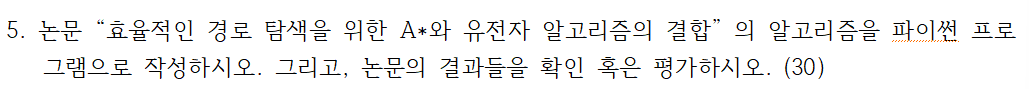
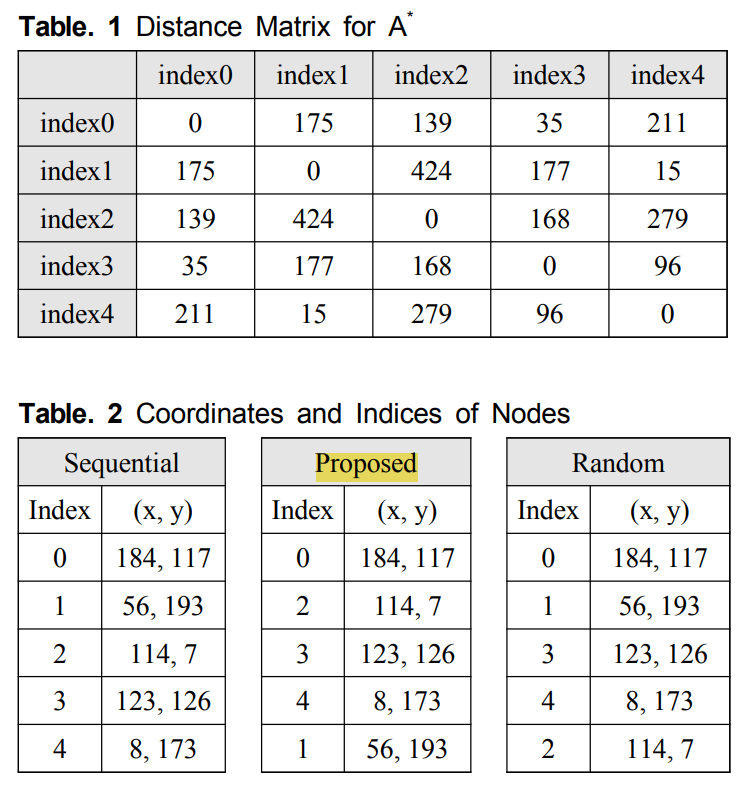
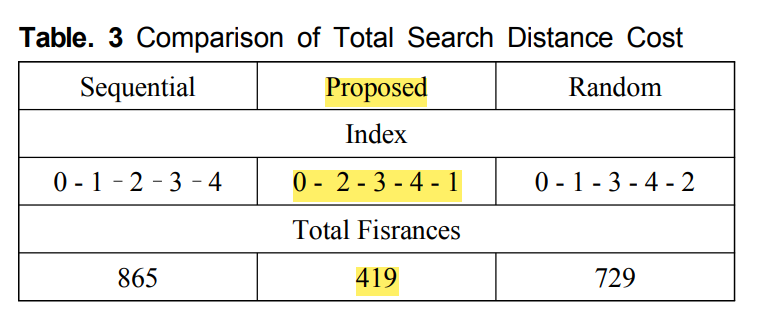

In [6]:
import numpy as np
import random

# 거리 행렬
distance_matrix = np.array([[0, 175, 139, 35, 211],
                            [175, 0, 424, 177, 15],
                            [139, 424, 0, 168, 279],
                            [35, 177, 168, 0, 96],
                            [211, 15, 279, 96, 0]])

# 노드의 좌표와 인덱스
coordinates = {0: (184, 117),
               1: (56, 193),
               2: (114, 7),
               3: (123, 126),
               4: (8, 173)}

# 유전자 알고리즘 파라미터
population_size = 100
mutation_rate = 0.01
generations = 100

def astar(start, goal):
    open_list = [start]
    closed_list = []

    g_scores = {node: float('inf') for node in coordinates}
    g_scores[start] = 0

    f_scores = {node: float('inf') for node in coordinates}
    f_scores[start] = heuristic(start, goal)

    while open_list:
        current = min(open_list, key=lambda node: f_scores[node])

        if current == goal:
            return g_scores[current]

        open_list.remove(current)
        closed_list.append(current)

        for neighbor in coordinates:
            if neighbor == current or neighbor in closed_list:
                continue

            g_score = g_scores[current] + distance_matrix[current][neighbor]
            if g_score < g_scores[neighbor]:
                g_scores[neighbor] = g_score
                f_scores[neighbor] = g_score + heuristic(neighbor, goal)

                if neighbor not in open_list:
                    open_list.append(neighbor)

    return float('inf')

def heuristic(node1, node2):
    x1, y1 = coordinates[node1]
    x2, y2 = coordinates[node2]
    return np.sqrt((x2 - x1) ** 2 + (y2 - y1) ** 2)

# 초기 개체 생성
def create_individual():
    nodes = list(coordinates.keys())[1:]
    random.shuffle(nodes)
    return [0] + nodes

# 개체의 적합도 계산 (거리의 역수로 계산)
def fitness(individual):
    total_distance = 0
    for i in range(len(individual) - 1):
        node1 = individual[i]
        node2 = individual[i + 1]
        total_distance += distance_matrix[node1][node2]
    return 1 / total_distance

# 교배 연산
def crossover(parent1, parent2):
    cut_point = random.randint(1, len(parent1) - 1)
    child = parent1[:cut_point] + [node for node in parent2 if node not in parent1[:cut_point]]
    return child

# 돌연변이 발생
def mutate(individual):
    for i in range(1, len(individual)):
        if random.random() < mutation_rate:
            swap_index = random.randint(1, len(individual) - 1)
            individual[i], individual[swap_index] = individual[swap_index], individual[i]
    return individual

# 초기 개체 집합 생성
population = [create_individual() for _ in range(population_size)]

# 유전자 알고리즘 실행
for generation in range(generations):
    # 적합도 평가
    fitness_scores = [fitness(individual) for individual in population]
    best_individual = population[np.argmax(fitness_scores)]
    best_fitness = np.max(fitness_scores)

    # 새로운 개체 생성
    new_population = [best_individual]

    while len(new_population) < population_size:
        parent1, parent2 = random.choices(population, weights=fitness_scores, k=2)
        child = crossover(parent1, parent2)
        child = mutate(child)
        new_population.append(child)

    population = new_population

# 최적 경로 및 총 거리 계산
optimal_path_indices = best_individual
optimal_path = [coordinates[index] for index in optimal_path_indices]
total_distance = sum(distance_matrix[optimal_path_indices[i]][optimal_path_indices[i + 1]] for i in range(len(optimal_path_indices) - 1))

print("Optimal_path_Index :", optimal_path_indices)
print("Optimal_path :", optimal_path)
print("Total Fisrances :", total_distance)


Optimal_path_Index : [0, 2, 3, 4, 1]
Optimal_path : [(184, 117), (114, 7), (123, 126), (8, 173), (56, 193)]
Total Fisrances : 418


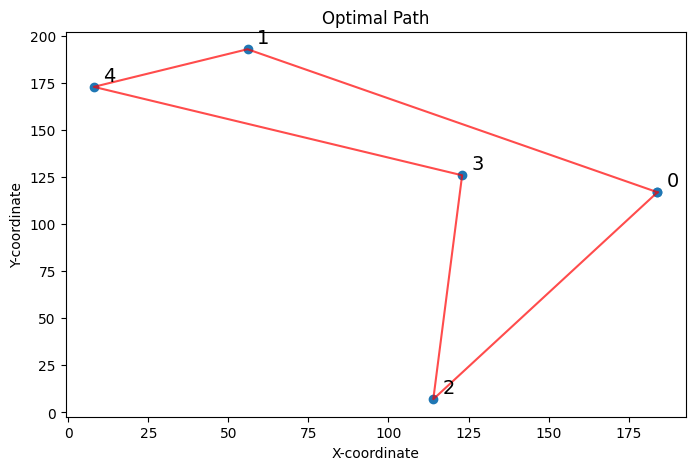

In [5]:
import matplotlib.pyplot as plt

# 시각화 함수 생성
def plot_path(coordinates, optimal_path_indices, optimal_path):
    x_coords = [coordinates[node][0] for node in optimal_path_indices] + [coordinates[optimal_path_indices[0]][0]]
    y_coords = [coordinates[node][1] for node in optimal_path_indices] + [coordinates[optimal_path_indices[0]][1]]
    
    plt.figure(figsize=(8,5))
    plt.scatter(x_coords, y_coords)
    plt.plot(x_coords, y_coords, 'r-', alpha=0.7)

    # 좌표와 인덱스 출력
    for index, coord in coordinates.items():
        plt.text(coord[0]+3, coord[1]+3, str(index), fontsize=14)

    plt.xlabel("X-coordinate")
    plt.ylabel("Y-coordinate")
    plt.title("Optimal Path")
    plt.show()

desired_optimal_path_indices = [0, 2, 3, 4, 1]
desired_optimal_path = [coordinates[index] for index in desired_optimal_path_indices]

# 시각화 실행
plot_path(coordinates, desired_optimal_path_indices, desired_optimal_path)


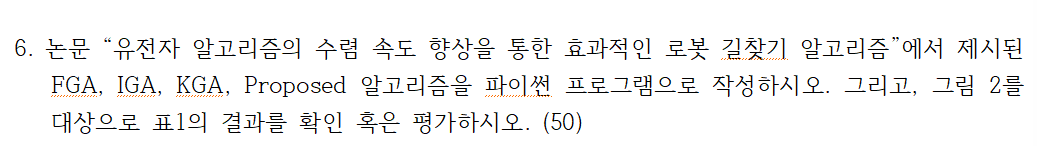
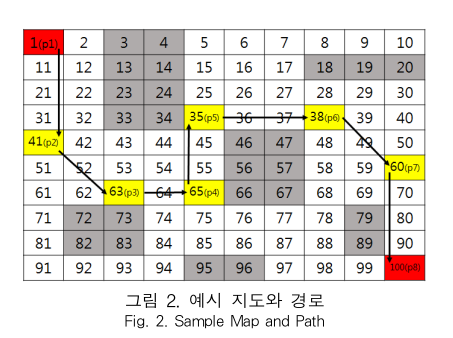
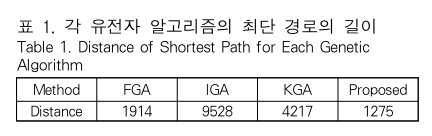

# FGA

In [13]:
import random

# 테이블 크기
table_size = 10
table = [[i + 1 + j * table_size for i in range(table_size)] for j in range(table_size)]

# 막힌 부분
obstacles = [3, 4, 13, 14, 18, 19, 20, 23, 24, 33, 34, 46, 47, 56, 57, 66, 67, 72, 73, 79, 82, 83, 89, 95, 96]

def create_individual():
    individual = [1]  # 시작지점은 고정으로 1로 설정
    available_vertices = list(set(range(2, table_size**2)) - set(obstacles))
    random.shuffle(available_vertices)
    individual.extend(available_vertices[:7])  # 총 8개의 정점 이동
    individual.append(100)  # 도착지점은 고정으로 100으로 설정
    return individual

# 개체의 적합도 계산
def calculate_fitness(individual):
    score = 0
    for i in range(len(individual) - 1):
        current_pos = individual[i]
        next_pos = individual[i + 1]
        if current_pos in obstacles or next_pos in obstacles:
            return 0  # 막힌 부분에 대한 경로는 유효하지 않음
        x1, y1 = (current_pos - 1) % table_size, (current_pos - 1) // table_size
        x2, y2 = (next_pos - 1) % table_size, (next_pos - 1) // table_size
        score += abs(x2 - x1) + abs(y2 - y1)
    return 1 / score

# 선택 연산
def selection(population, fitnesses):
    index1 = random.randint(0, len(population) - 1)
    index2 = random.randint(0, len(population) - 1)
    return population[index1] if fitnesses[index1] > fitnesses[index2] else population[index2]

# 교차 연산
def crossover(parent1, parent2):
    index1 = random.randint(1, len(parent1) - 2)
    index2 = random.randint(1, len(parent1) - 2)
    start = min(index1, index2)
    end = max(index1, index2)
    
    visited = set(parent1[start:end + 1])
    child = [1]  # 시작 노드를 1로 설정
    
    for gene in parent1[start:end + 1]:
        if gene not in [1, 100]:ㅠ
            child.append(gene)
    
    for gene in parent2:
        if gene not in visited and gene not in [1, 100]:
            child.append(gene)
    
    child.append(100)  # 종료 노드를 100로 설정
    
    return child

# 돌연변이 연산
def mutate(individual, mutation_rate):
    for i in range(1, len(individual) - 1):
        if random.random() < mutation_rate:
            index1 = random.randint(1, len(individual) - 2)
            index2 = random.randint(1, len(individual) - 2)
            individual[index1], individual[index2] = individual[index2], individual[index1]
    return individual

# Fast genetic algorithm
def fast_genetic_algorithm(population_size, mutation_rate, num_generations):
    population = [create_individual() for _ in range(population_size)]
    
    for _ in range(num_generations):
        fitnesses = [calculate_fitness(individual) for individual in population]
        next_generation = []
        
        for _ in range(population_size):
            parent1 = selection(population, fitnesses)
            parent2 = selection(population, fitnesses)
            child = crossover(parent1, parent2)
            child = mutate(child, mutation_rate)
            next_generation.append(child)
        
        population = next_generation
    
    best_individual = max(population, key=calculate_fitness)
    return best_individual

# 최단 경로의 길이 계산
def calculate_path_length(path):
    length = 0
    for i in range(len(path) - 1):
        current_pos = path[i]
        next_pos = path[i + 1]
        x1, y1 = (current_pos - 1) % table_size, (current_pos - 1) // table_size
        x2, y2 = (next_pos - 1) % table_size, (next_pos - 1) // table_size
        length += abs(x2 - x1) + abs(y2 - y1)
    return length

total_path_lengths=[] # 경로 길이를 저장하는 리스트
# 30번 반복하여 실행
for _ in range(30):
    best_path = fast_genetic_algorithm(population_size=100, mutation_rate=0.01, num_generations=1000)
    
    path_length = calculate_path_length(best_path) # 경로 길이 계산
    total_path_lengths.append(path_length)
    
    # 시작지점과 종료지점이 1과 100인지 확인 후 수정
    if best_path[0] != 1:
        best_path[0] = 1
    if best_path[-1] != 100:
        best_path[-1] = 100

    # 최단 경로 출력
    print(_,"번")
    print("최적 경로:", best_path)
    print("최단 경로의 길이:", path_length)
    print("------------------------")

average_path_length = sum(total_path_lengths) / len(total_path_lengths)
print("평균 최단 경로 길이:", average_path_length)


0 번
최적 경로: [1, 32, 31, 55, 71, 48, 11, 2, 12, 5, 39, 68, 51, 54, 62, 78, 28, 36, 38, 25, 27, 74, 84, 35, 53, 85, 65, 93, 45, 64, 37, 9, 8, 17, 60, 98, 80, 59, 77, 100]
최단 경로의 길이: 176
------------------------
1 번
최적 경로: [1, 16, 27, 15, 61, 74, 91, 78, 99, 60, 40, 29, 17, 28, 44, 70, 54, 43, 42, 6, 25, 81, 85, 63, 76, 68, 30, 39, 38, 2, 5, 8, 9, 10, 49, 87, 45, 94, 75, 100]
최단 경로의 길이: 174
------------------------
2 번
최적 경로: [1, 32, 52, 21, 11, 85, 43, 55, 74, 53, 51, 88, 87, 42, 37, 77, 76, 98, 65, 94, 63, 2, 26, 27, 35, 44, 28, 6, 25, 16, 69, 78, 75, 68, 84, 64, 15, 40, 90, 60, 30, 48, 10, 36, 7, 5, 100]
최단 경로의 길이: 208
------------------------
3 번
최적 경로: [1, 35, 43, 52, 50, 37, 26, 87, 92, 42, 63, 27, 40, 30, 39, 9, 38, 8, 49, 28, 55, 54, 94, 74, 84, 41, 78, 6, 85, 76, 60, 86, 15, 65, 45, 36, 58, 70, 98, 77, 97, 88, 100]
최단 경로의 길이: 184
------------------------
4 번
최적 경로: [1, 98, 30, 10, 9, 17, 42, 54, 59, 60, 25, 29, 22, 32, 2, 48, 50, 77, 87, 39, 49, 88, 41, 31, 21, 61, 91, 62, 36, 15,

# IGA

In [55]:
import numpy as np
import random

class ImprovedGeneticAlgorithm:
    def __init__(self, map_table, obstacle_list, generations, population_size, mutation_rate, crossover_rate):
        self.map_table = map_table
        self.map_size = len(map_table)
        self.obstacle_list = obstacle_list
        self.generations = generations
        self.population_size = population_size
        self.mutation_rate = mutation_rate
        self.crossover_rate = crossover_rate

        self.start = (0, 0)
        self.end = (self.map_size - 1, self.map_size - 1)

        self.population = self.initialize_population()

    def is_valid_edge(self, r1, c1, r2, c2):
        if (r2, c2) in self.obstacle_list:
            return False
        row_diff = abs(r1 - r2)
        col_diff = abs(c1 - c2)
        return (row_diff == 1 and col_diff == 0) or (row_diff == 0 and col_diff == 1)

    def initialize_population(self):
        population = []

        for _ in range(self.population_size):
            path = [self.start]
            current = self.start

            while current != self.end:
                r, c = current
                neighbors = [(r - 1, c), (r + 1, c), (r, c - 1), (r, c + 1)]
                valid_neighbors = [n for n in neighbors if self.is_valid_edge(r, c, n[0], n[1])]
                next_node = random.choice(valid_neighbors)
                path.append(next_node)
                current = next_node

            population.append(path)

        return population

    def fitness_function(self, path):
        fitness = 0
        for i in range(1, len(path)):
            prev = path[i - 1]
            curr = path[i]
            fitness += np.sqrt((prev[0] - curr[0]) ** 2 + (prev[1] - curr[1]) ** 2)
        return fitness

    def selection_operator(self, weighted_population):
        return random.choices(weighted_population, weights=[1 / fit for (_, fit) in weighted_population])[0]

    def crossover_operator(self, path1, path2):
        crossover_point = random.randint(1, len(path1) - 1)
        new_path = path1[:crossover_point]
        for p in path2:
            if p not in new_path:
                new_path.append(p)
        return new_path

    def mutation_operator(self, path):
        mutation_index = random.randint(1, len(path) - 2)
        new_path = path[:]
        new_point = (random.randint(0, self.map_size - 1), random.randint(0, self.map_size - 1))
        new_path[mutation_index] = new_point
        return new_path

    def run_algorithm(self):
        for _ in range(self.generations):
            new_population = []
            weighted_population = [(p, self.fitness_function(p)) for p in self.population]

            for _ in range(self.population_size):
                parent1 = self.selection_operator(weighted_population)
                parent2 = self.selection_operator(weighted_population)

                if random.random() < self.crossover_rate:
                    offspring = self.crossover_operator(parent1, parent2)
                else:
                    offspring = parent1

                if random.random() < self.mutation_rate:
                    offspring = self.mutation_operator(offspring)

                new_population.append(offspring)

            self.population = new_population

            # 종료 조건 추가
            best_path = min(self.population, key=self.fitness_function)
            if self.fitness_function(best_path) == 0:
                break

    return min(self.population, key=self.fitness_function)



if __name__ == "__main__":
    map_table = [
        [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
        [11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
        [21, 22, 23, 24, 25, 26, 27, 28, 29, 30],
        [31, 32, 33, 34, 35, 36, 37, 38, 39, 40],
        [41, 42, 43, 44, 45, 46, 47, 48, 49, 50],
        [51, 52, 53, 54, 55, 56, 57, 58, 59, 60],
        [61, 62, 63, 64, 65, 66, 67, 68, 69, 70],
        [71, 72, 73, 74, 75, 76, 77, 78, 79, 80],
        [81, 82, 83, 84, 85, 86, 87, 88, 89, 90],
        [91, 92, 93, 94, 95, 96, 97, 98, 99, 100],
    ]
    obstacle_list = [(0, 2), (0, 3), (1, 2), (1, 3), (1, 7), (1, 8), (1, 9), (2, 2), (2, 3), (3, 2), (3, 3), (4, 5), (4, 6), (5, 6), (5, 7), (6, 6), (6, 7), (7, 1), (7, 2), (7, 8), (8, 1), (8, 2), (8, 8), (9, 4), (9, 5)]

    generations = 100
    population_size = 50
    mutation_rate = 0.2
    crossover_rate = 0.8

    iga = ImprovedGeneticAlgorithm(map_table, obstacle_list, generations, population_size, mutation_rate, crossover_rate)
    optimal_path = iga.run_algorithm()
    print("Optimal path:", optimal_path)


SyntaxError: 'return' outside function (4086885206.py, line 97)

In [ ]:
import numpy as np
import random

class ImprovedGeneticAlgorithm:
    def __init__(self, map_table, obstacle_list, generations, population_size, mutation_rate, crossover_rate):
        self.map_table = map_table
        self.map_size = len(map_table)
        self.obstacle_list = obstacle_list
        self.generations = generations
        self.population_size = population_size
        self.mutation_rate = mutation_rate
        self.crossover_rate = crossover_rate

        self.start = (0, 0)
        self.end = (self.map_size - 1, self.map_size - 1)

        self.population = self.initialize_population()

    def is_valid_edge(self, r1, c1, r2, c2):
        if (r2, c2) in self.obstacle_list:
            return False
        row_diff = abs(r1 - r2)
        col_diff = abs(c1 - c2)
        return (row_diff == 1 and col_diff == 0) or (row_diff == 0 and col_diff == 1)

    def initialize_population(self):
        population = []

        for _ in range(self.population_size):
            path = [self.start]
            current = self.start

            while current != self.end:
                r, c = current
                neighbors = [(r - 1, c), (r + 1, c), (r, c - 1), (r, c + 1)]
                valid_neighbors = [n for n in neighbors if self.is_valid_edge(r, c, n[0], n[1])]
                next_node = random.choice(valid_neighbors)
                path.append(next_node)
                current = next_node

            population.append(path)

        return population

    def fitness_function(self, path):
        fitness = 0
        for i in range(1, len(path)):
            prev = path[i - 1]
            curr = path[i]
            fitness += np.sqrt((prev[0] - curr[0]) ** 2 + (prev[1] - curr[1]) ** 2)
        return fitness

    def selection_operator(self, weighted_population):
        return random.choices(weighted_population, weights=[1 / fit for (_, fit) in weighted_population])[0]

    def crossover_operator(self, path1, path2):
        crossover_point = random.randint(1, len(path1) - 1)
        new_path = path1[:crossover_point]
        for p in path2:
            if p not in new_path:
                new_path.append(p)
        return new_path

    def mutation_operator(self, path):
        mutation_index = random.randint(1, len(path) - 2)
        new_path = path[:]
        new_point = (random.randint(0, self.map_size - 1), random.randint(0, self.map_size - 1))
        new_path[mutation_index] = new_point
        return new_path

    def run_algorithm(self):
        for _ in range(self.generations):
            new_population = []
            weighted_population = [(p, self.fitness_function(p)) for p in self.population]

            for _ in range(self.population_size):
                parent1 = self.selection_operator(weighted_population)
                parent2 = self.selection_operator(weighted_population)

                if random.random() < self.crossover_rate:
                    offspring = self.crossover_operator(parent1, parent2)
                else:
                    offspring = parent1

                if random.random() < self.mutation_rate:
                    offspring = self.mutation_operator(offspring)

                new_population.append(offspring)

            self.population = new_population

            # 종료 조건 추가
            best_path = min(self.population, key=self.fitness_function)
            if self.fitness_function(best_path) == 0:
                return best_path

        return min(self.population, key=self.fitness_function)


if __name__ == "__main__":
    map_table = [
        [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
        [11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
        [21, 22, 23, 24, 25, 26, 27, 28, 29, 30],
        [31, 32, 33, 34, 35, 36, 37, 38, 39, 40],
        [41, 42, 43, 44, 45, 46, 47, 48, 49, 50],
        [51, 52, 53, 54, 55, 56, 57, 58, 59, 60],
        [61, 62, 63, 64, 65, 66, 67, 68, 69, 70],
        [71, 72, 73, 74, 75, 76, 77, 78, 79, 80],
        [81, 82, 83, 84, 85, 86, 87, 88, 89, 90],
        [91, 92, 93, 94, 95, 96, 97, 98, 99, 100],
    ]
    obstacle_list = [(0, 2), (0, 3), (1, 2), (1, 3), (1, 7), (1, 8), (1, 9), (2, 2), (2, 3), (3, 2), (3, 3), (4, 5), (4, 6), (5, 6), (5, 7), (6, 6), (6, 7), (7, 1), (7, 2), (7, 8), (8, 1), (8, 2), (8, 8), (9, 4), (9, 5)]

    generations = 100
    population_size = 50
    mutation_rate = 0.2
    crossover_rate = 0.8

    iga = ImprovedGeneticAlgorithm(map_table, obstacle_list, generations, population_size, mutation_rate, crossover_rate)
    optimal_path = iga.run_algorithm()
    print("Optimal path:", optimal_path)


# Proposed

In [51]:
import numpy as np
import random
import math

class GeneticAlgorithm:
    def __init__(self, map_table, obstacle_list, generations, population_size, mutation_rate, crossover_rate, shortcut_rate, penalty):
        self.map_table = map_table
        self.map_size = len(map_table)
        self.obstacle_list = obstacle_list
        self.generations = generations
        self.population_size = population_size
        self.mutation_rate = mutation_rate
        self.crossover_rate = crossover_rate
        self.shortcut_rate = shortcut_rate
        self.penalty = penalty

        self.start = (0, 0)
        self.end = (self.map_size - 1, self.map_size - 1)

        self.population = self.initialize_population()

    def is_valid_edge(self, r1, c1, r2, c2):
        if (r2, c2) in self.obstacle_list:
            return False
        row_diff = abs(r1 - r2)
        col_diff = abs(c1 - c2)
        return (row_diff == 1 and col_diff == 0) or (row_diff == 0 and col_diff == 1)

    def initialize_population(self):
        population = []
        for _ in range(self.population_size):
            path = [self.start]
            current = self.start
            while current != self.end:
                r, c = current
                neighbors = [(r-1, c), (r+1, c), (r, c-1), (r, c+1)]
                valid_neighbors = [n for n in neighbors if self.is_valid_edge(r, c, n[0], n[1]) and 0 <= n[0] < self.map_size and 0 <= n[1] < self.map_size]
                next_node = random.choice(valid_neighbors)
                path.append(next_node)
                current = next_node
            population.append(path)
        return population

    def fit_function(self, path):
        fitness = 0
        for i in range(len(path) - 1):
            edge_length = np.sqrt((path[i][0] - path[i+1][0])**2 + (path[i][1] - path[i+1][1])**2)
            if not self.is_valid_edge(path[i][0], path[i][1], path[i+1][0], path[i+1][1]):
                fitness += self.penalty
            fitness += edge_length
        return fitness

    def crossover_operator(self, path1, path2):
        crossover_point = random.randint(1, min(len(path1), len(path2)) - 1)
        new_path = path1[:crossover_point]
        for p in path2:
            if p not in new_path:
                new_path.append(p)
        return new_path

    def mutation_operator(self, path):
        mutation_index = random.randint(1, len(path) - 2)
        new_path = path[:]
        new_point = (random.randint(0, self.map_size - 1), random.randint(0, self.map_size - 1))
        new_path[mutation_index] = new_point
        return new_path

    def shortcut_operator(self, path):
        indices = range(1, len(path) - 1)
        selected_indices = sorted(random.sample(indices, 2))
        shortcut_path = path[:selected_indices[0]] + path[selected_indices[1]:]
        if self.is_valid_edge(path[selected_indices[0]-1][0], path[selected_indices[0]-1][1], path[selected_indices[1]][0], path[selected_indices[1]][1]):
            return shortcut_path
        else:
            return path

    def natural_selection(self, combined_population):
        fit_values = [(path, self.fit_function(path)) for path in combined_population]
        fit_values.sort(key=lambda x: x[1])
        return [path for path, _ in fit_values[:self.population_size]]

    def run_algorithm(self):
        for i in range(self.generations):
            new_population = []
            for path in self.population:
                if random.random() < self.crossover_rate and len(new_population) < self.population_size - 1:
                    selected_path = random.choice(self.population)
                    new_path = self.crossover_operator(path, selected_path)
                    new_population.append(new_path)
                if random.random() < self.mutation_rate:
                    new_path = self.mutation_operator(path)
                    new_population.append(new_path)
                if random.random() < self.shortcut_rate:
                    new_path = self.shortcut_operator(path)
                    new_population.append(new_path)
            combined_population = self.population + new_population
            self.population = self.natural_selection(combined_population)

        return min(self.population, key=self.fit_function)

    def calculate_total_distance(path):
        total_distance = 0
        for i in range(len(path) - 1):
            edge_length = np.sqrt((path[i][0] - path[i+1][0])**2 + (path[i][1] - path[i+1][1])**2)
            total_distance += edge_length
        return total_distance
    
if __name__ == "__main__":
    map_table = [
        [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
        [11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
        [21, 22, 23, 24, 25, 26, 27, 28, 29, 30],
        [31, 32, 33, 34, 35, 36, 37, 38, 39, 40],
        [41, 42, 43, 44, 45, 46, 47, 48, 49, 50],
        [51, 52, 53, 54, 55, 56, 57, 58, 59, 60],
        [61, 62, 63, 64, 65, 66, 67, 68, 69, 70],
        [71, 72, 73, 74, 75, 76, 77, 78, 79, 80],
        [81, 82, 83, 84, 85, 86, 87, 88, 89, 90],
        [91, 92, 93, 94, 95, 96, 97, 98, 99, 100]
    ]
    obstacle_list = [(0, 2), (0, 3), (1, 2), (1, 3), (1, 7), (1, 8), (1, 9), (2, 2), (2, 3), (3, 2), (3, 3), (4, 5), (4, 6), (5, 6), (5, 7), (6, 6), (6, 7), (7, 1), (7, 2), (7, 8), (8, 1), (8, 2), (8, 8), (9, 4), (9, 5)]
    generations = 100
    population_size = 50
    mutation_rate = 0.2
    crossover_rate = 0.8
    shortcut_rate = 0.5
    penalty = 10000

    results = []
    for _ in range(30):
        ga = GeneticAlgorithm(map_table, obstacle_list, generations, population_size, mutation_rate, crossover_rate, shortcut_rate, penalty)
        optimal_map_node_path = ga.run_algorithm()
        optimal_map_value_path = [map_table[node[0]][node[1]] for node in optimal_map_node_path]
        optimal_path_distance = GeneticAlgorithm.calculate_total_distance(optimal_map_node_path)

        results.append({
            "optimal_map_node_path": optimal_map_node_path,
            "optimal_map_value_path": optimal_map_value_path,
            "optimal_path_distance": optimal_path_distance
        })

    for i, result in enumerate(results, start=1):
        print(f"반복 {i}:")
        print("최적 경로 숫자 값:")
        for value in result["optimal_map_value_path"]:
            print(value)

        print("\n최적 경로 거리 값:")
        print(result["optimal_path_distance"])
        print("\n")

반복 1:
최적 경로 숫자 값:
1
11
12
22
32
42
43
44
45
55
65
75
85
86
87
97
98
99
100

최적 경로 거리 값:
18.0


반복 2:
최적 경로 숫자 값:
1
11
21
22
32
42
52
62
63
64
74
75
85
86
87
88
98
99
100

최적 경로 거리 값:
18.0


반복 3:
최적 경로 숫자 값:
1
2
12
22
32
42
52
53
54
64
74
75
76
77
78
88
98
99
100

최적 경로 거리 값:
18.0


반복 4:
최적 경로 숫자 값:
1
11
21
22
32
42
52
53
54
55
65
66
76
77
78
88
98
99
100

최적 경로 거리 값:
18.0


반복 5:
최적 경로 숫자 값:
1
2
12
22
32
42
43
44
45
55
56
66
76
77
78
88
98
99
100

최적 경로 거리 값:
18.0


반복 6:
최적 경로 숫자 값:
1
11
21
31
41
42
43
53
63
64
65
75
85
86
87
88
98
99
100

최적 경로 거리 값:
18.0


반복 7:
최적 경로 숫자 값:
1
11
21
22
32
42
43
44
45
55
56
66
76
86
87
88
98
99
100

최적 경로 거리 값:
18.0


반복 8:
최적 경로 숫자 값:
1
11
21
31
41
42
43
53
63
64
65
75
76
77
87
88
98
99
100

최적 경로 거리 값:
18.0


반복 9:
최적 경로 숫자 값:
1
11
21
31
41
51
61
62
63
64
65
75
76
77
87
97
98
99
100

최적 경로 거리 값:
18.0


반복 10:
최적 경로 숫자 값:
1
11
21
31
41
42
43
53
54
64
74
75
85
86
87
88
98
99
100

최적 경로 거리 값:
18.0


반복 11:
최적 경로 숫자 값:
1
2
12
22
32
42
43
53
63
64
74
7

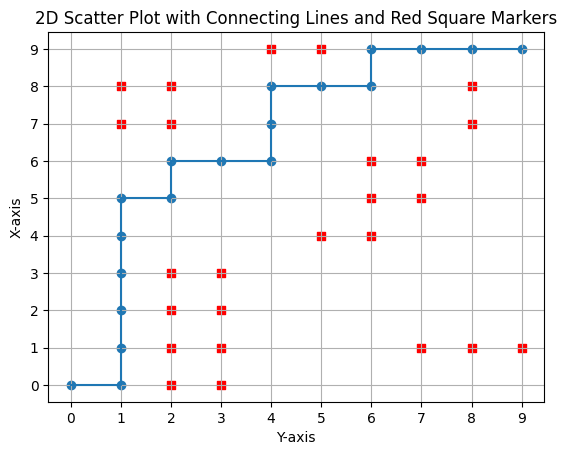

In [45]:
import matplotlib.pyplot as plt

# 주어진 데이터
data = [
    (0, 0), (0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1),
    (5, 2), (6, 2), (6, 3), (6, 4), (7, 4), (8, 4), (8, 5),
    (8, 6), (9, 6), (9, 7), (9, 8), (9, 9)
]

red_square_data = [
    (0, 2), (0, 3), (1, 2), (1, 3), (1, 7), (1, 8), (1, 9),
    (2, 2), (2, 3), (3, 2), (3, 3), (4, 5), (4, 6), (5, 6),
    (5, 7), (6, 6), (6, 7), (7, 1), (7, 2), (7, 8), (8, 1),
    (8, 2), (8, 8), (9, 4), (9, 5)
]

x = [point[0] for point in data]
y = [point[1] for point in data]

red_square_x = [point[0] for point in red_square_data]
red_square_y = [point[1] for point in red_square_data]

# 새로운 코드
plt.scatter(y, x)  # x와 y를 바꿔줍니다.
plt.plot(y, x)  # x와 y를 바꿔줍니다.

plt.scatter(red_square_y, red_square_x, color='red', marker='s')  # x와 y를 바꿔줍니다.

# 새로운 코드
plt.xticks(range(10))  # x축의 눈금을 0부터 9까지 설정합니다.
plt.yticks(range(10))  # y축의 눈금을 0부터 9까지 설정합니다.

plt.xlabel("Y-axis")  # x축과 y축의 레이블을 변경합니다.
plt.ylabel("X-axis")  # x축과 y축의 레이블을 변경합니다.
plt.title("2D Scatter Plot with Connecting Lines and Red Square Markers")

plt.grid(True)

plt.show()


crossover - Two-point crossover를 사용하여 새로운 자식 경로 생성
1.두 개의 부모 개체를 선택합니다. 이 부모 개체는 이전 세대의 우수한 해들 중에서 선택되는 경우가 일반적입니다.
2.교차 지점(crossover points)을 두 개 무작위로 선택합니다. 이 교차 지점은 개체의 염색체(또는 경로, 유전 정보 등)에서 교환할 부분을 나누는 역할을 합니다.
3.선택된 교차 지점을 기준으로 두 부모 개체의 정보를 교환합니다. 교차 지점 사이의 부분을 서로 교환합니다.
4.새로운 자손 개체를 생성합니다. 부모 개체의 교차 지점 사이의 부분을 교환한 결과가 자손 개체가 됩니다.


mutation - 돌연변이 연산자는 경로 내부에서 무작위로 한 정점을 잡아서 지도 내의 무작위 정점으로 교체하는 방법 으로 새로운 경로를 생성.

shortcut - 단축 연산자는 경로 내부의 두 정점을 선택하고 선택된 구간을 삭제하는 방식으로 경로의 길이를 단축시킨다. 단축 연산자의 동작은 다음과 같다. (식1) f(p _{i} )`=` {g(p _{i} )} over {sum _{j`=`i} ^{k} g(p _{j} )}  먼저 주어진 경로의 정점들에 식 (1)을 이용하여 선택 확률을 부여한다. 식(1)의 p _{i}는 경로 P의 i번째 정점을 나타낸다.

g(p _{i})는 식(2)와 같이 정의된다.
식(2) g(p _{i} )=-vert i- {l+1} over {2} vert + {l-1} over {2} 

식(2)의 l은 경로 P에 포함된 정점들의 개수를 나타낸다. 정점 별로 선택 확률이 부여되면 선택 확률에 따라 경로 안에서 두 개의 정점을 선택한다. 정점이 선택되면 두 정점 사이의 다른 정점들을 모두 제거하고 해당 경로를 반환한다. 만약 교차, 돌연변이, 단축 연산자를 적용한 결과로 안전하지 않은 경로가 생성될 경우 연산자를 실행하기 전의 경로를 반환한다. 


> 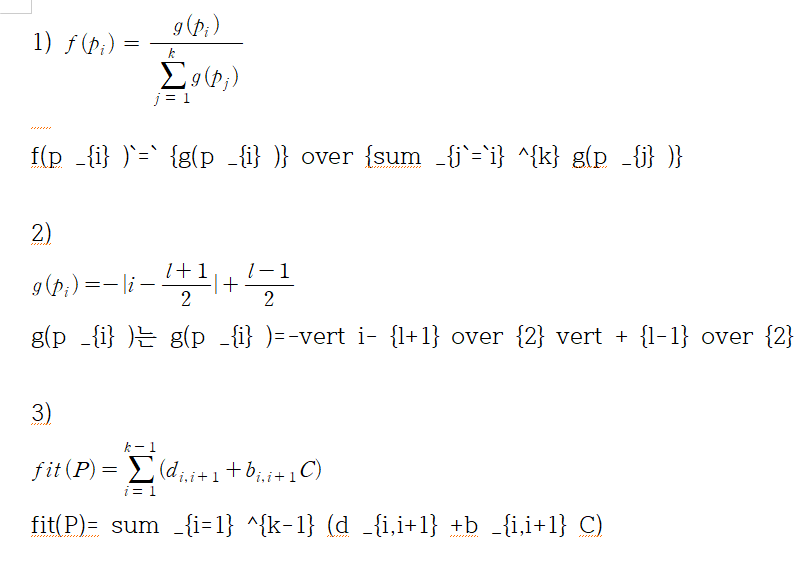

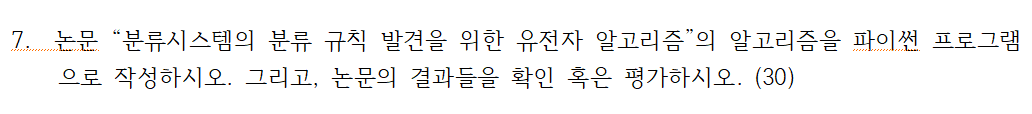